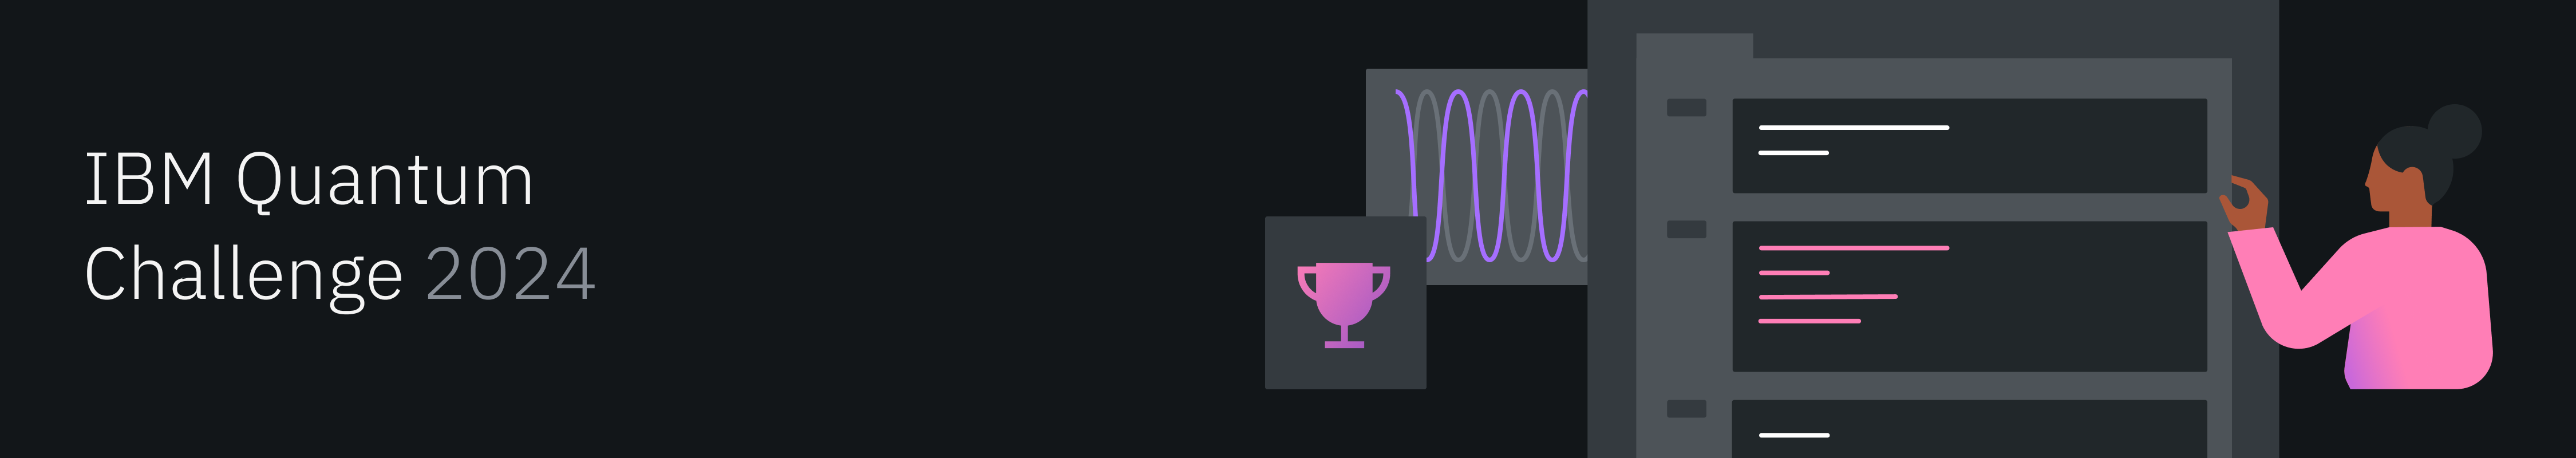

# 量子状態の構築と測定

## はじめに
> このLabは2024年Challenge Lab1の内容を基に作成しています。

Lab 1 へようこそ！この最初の Lab は、 Qiskit 1.0の新機能の一部を紹介するためのものです。後の Challenge ではこれらの機能をさらに発展させ、より複雑な Qiskit の新機能を紹介します。

この Lab では、Qiskitを使用して量子状態を設定する方法を学びます。  
それでは始めましょう！

In [1]:
import qiskit
qiskit.__version__

'1.4.2'

In [2]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

## Exercise: ベル状態の回路の実装

````{admonition} Exercise
ベル回路は、EPRペアを生成する回路であり、エンタングルされ正規化された基底ベクトルの一種を作る回路です。 つまり量子ビットの重要な特性であるエンタングルメント状態を生成するための回路です。

ベル状態は異なる4つの状態が存在します。 それぞれについて、 [量子情報の基礎のページ](https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems#bell-states) で学ぶことができます。

**あなたのタスク：** $| \psi ^- \rangle$ のベル状態を生成する回路を構築してください。

```python
"""
 Build a circuit to form a psi-minus Bell state
 Apply gates to the provided QuantumCircuit, qc
"""

qc = QuantumCircuit(2)

##### Write your code below here #####



##### Don't change any code past this line #####
qc.measure_all()
qc.draw('mpl')
```
````

```{hint}
$\ket \psi ^- = \frac{1}{\sqrt{2}} (\ket{01} - \ket{10})$
```

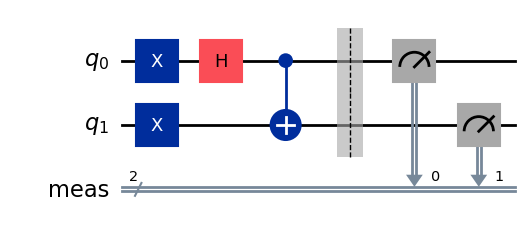

In [3]:
# Build a circuit to form a psi-minus Bell state
# Apply gates to the provided QuantumCircuit, qc

qc = QuantumCircuit(2)

### Write your code below here ###
qc.x(0)
qc.x(1)
qc.h(0)
qc.cx(0,1)
### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

この回路が作り出すエンタングルされた状態を観察するために、回路を何回も走らせ、最終的な量子ビットの測定値の統計を取ります。これが次の Exercise のゴールです。

## Exercise: 量子状態のサンプリング
````{admonition} Exercise
[Qiskit Sampler](https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.StatevectorSampler) Primitive ([Primitives の詳細はこちら](https://docs.quantum.ibm.com/run/primitives-get-started))は、指定された出力タイプに従ってサンプリングされた結果を返します。量子回路を実行し、量子状態の確率分布を提供することで、量子状態を効率的にサンプリングすることができます。

**あなたのタスク：** `StatevectorSampler` を使用して、回路を実行し、カウント結果を取得してください。

```python
qc.measure_all()

##### Write your code below here #####


sampler = #Add your code here
pub = #Add your code here
job_sampler = #Add your code here


##### Don't change any code past this line #####

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)
```
````

In [4]:
qc.measure_all()

### Write your code below here ###


sampler = StatevectorSampler() #Add your code here
pub = [qc] #Add your code here
job_sampler = sampler.run(pub) #Add your code here


### Don't change any code past this line ###

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'01': 512, '10': 512}


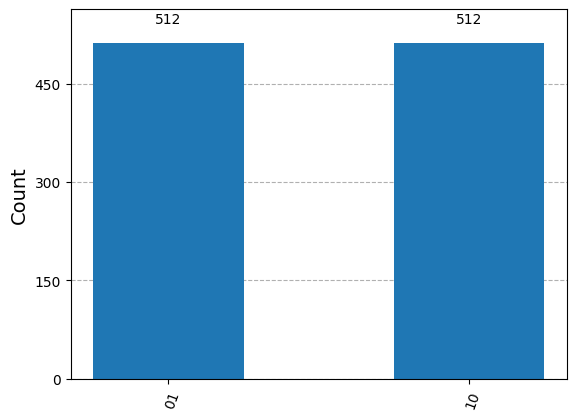

In [5]:
plot_histogram(counts_sampler)

ヒストグラムは、私たちの量子ビットが `01` か `10` の状態で見つかる確率がほぼ等しいことを示していて、エンタングルメントが期待通りに行われたことを示唆しています。

## Exercise: W状態回路の実装

````{admonition} Exercise
次に、少し複雑な回路を開発します。ベル状態を作るために2つの量子ビットをエンタングルさせましたが、3つの量子ビットをエンタングルさせたW状態を作ります。  
6つの簡単なステップを踏むことでW状態を作ることができます：

1) 3量子ビット回路を初期化します。
2) 量子ビットのRy回転を行います。この演算は与えられています。
3) 制御アダマールゲートをqubit 0を制御ビットとしてqubit 1に実行します。
4) qubit 1を制御ビット、qubit 2を目標ビットとして、CNOTゲートを実行します。
5) qubit 0を制御ビット、qubit 1を目標ビットとして、CNOTゲートを実行します。
6) qubit 0にXゲートを追加します。

**あなたのタスク：** 手順に従ってW状態回路を構築してください。

```python
##### Step 1
qc = #your_code_here

##### Step 2 (provided)
qc.ry(1.91063324, 0)

##### Add steps 3-6 below




##### Don't change any code past this line #####
qc.measure_all()
qc.draw('mpl')
```
````

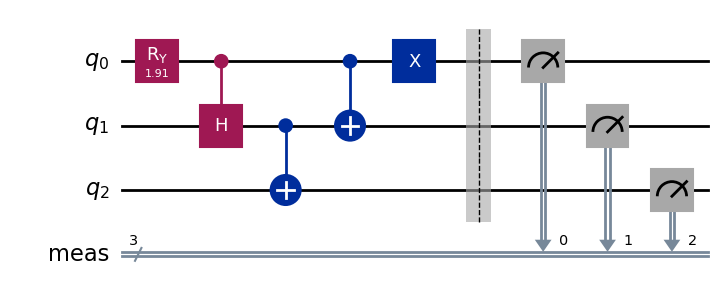

In [6]:
# Step 1
qc = QuantumCircuit(3) #your_code_here

# Step 2 (provided)
qc.ry(1.91063324, 0)

# Add steps 3-6 below
qc.ch(0, 1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.x(0)

### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

結果を視覚化してみましょう：

In [7]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'010': 3208, '001': 3356, '100': 3436}


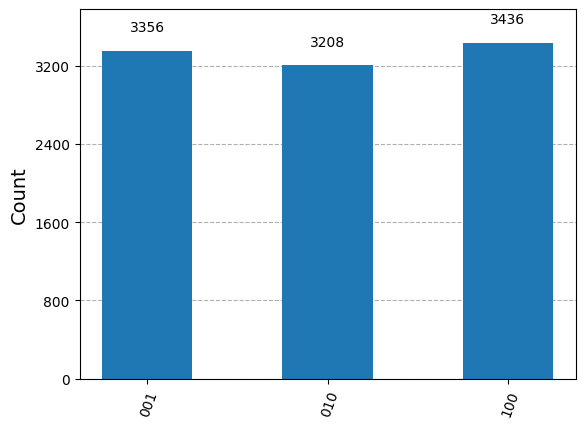

In [8]:
plot_histogram(counts_sampler)

合計カウントが 3 つの状態に同じように分布していることがわかり、W-状態であることが示されました。